In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/housing_area_price.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


,area
0,2600
1,3000
2,3200
3,3600
4,4000


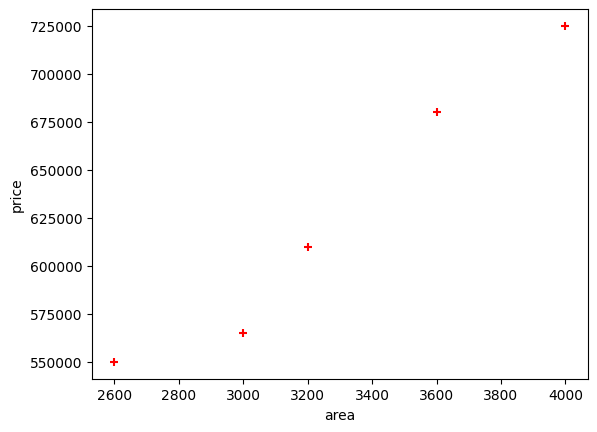

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
new_df

In [ ]:
price = df.price
price

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [ ]:


print(reg.coef_)

print(reg.intercept_)

[135.78767123]
180616.43835616432


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
reg.predict([[5000]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [ ]:
df_mlr=pd.read_csv('/content/homeprices_Multiple_LR.csv')
df_mlr

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
df_mlr.bedrooms.median()

df_mlr.bedrooms = df_mlr.bedrooms.fillna(df_mlr.bedrooms.median())
print(df_mlr)
reg = linear_model.LinearRegression()
reg.fit(df_mlr.drop('price',axis='columns'),df_mlr.price)
reg.coef_
reg.intercept_
#Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old
reg.predict([[3000, 3, 40]])
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       4.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


498408.25157402386

In [ ]:
canada=pd.read_csv('/content/canada_per_capita_income.csv')

canada

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


,year
12,1982
39,2009
34,2004
23,1993
15,1985


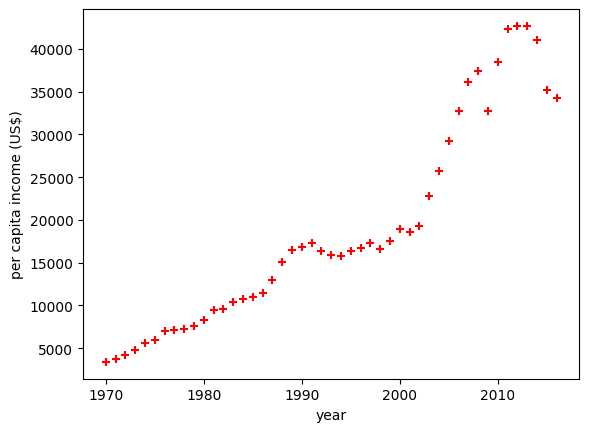

In [ ]:
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
canada.rename(columns={'per capita income (US$)':'income'},inplace=True)
plt.scatter(canada.year,canada.income ,color='red',marker='+')

new_df_canada = canada.drop('income',axis='columns')
new_df_canada.sample(5)

In [ ]:
income = canada.income
income.sample(5)

,income
15,11018.955850
25,16369.317250
12,9619.438377
3,4804.463248
44,41039.893600


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(new_df_canada,income)

LinearRegression()

In [ ]:
print(reg.coef_)

print(reg.intercept_)
reg.predict([[2020]])

[828.46507522]
-1632210.7578554575


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [ ]:
hiring=pd.read_csv('/content/hiring.csv')
hiring


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
hiring['experience'].fillna(0, inplace=True)

hiring['test_score(out of 10)'].fillna(hiring['test_score(out of 10)'].mean(), inplace=True)


def convert_to_int(word):
    word_dict = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8,
                'nine':9, 'ten':10, 'eleven':11, 'twelve':12, 'zero':0, 0: 0}
    return word_dict[word]

hiring['experience'] = hiring['experience'].apply(lambda x : convert_to_int(x))


hiring

<ipython-input-44-61350d327098>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hiring['test_score(out of 10)'].fillna(hiring['test_score(out of 10)'].mean(), inplace=True)


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [ ]:

reg = linear_model.LinearRegression()
hiring.rename(columns={'salary($)':'salary'},inplace=True)
reg.fit(hiring.drop('salary',axis='columns'),hiring.salary)
print(reg.coef_)
print(reg.intercept_)
#What is the predicted salary for a candidate with 12 years of experience, 10 test score, and 10 interview score?
reg.predict([[12, 10, 10]])


[2827.63404314 1912.93803053 2196.9753141 ]
17237.330313727172


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92268.07227784])

In [ ]:
comp=pd.read_csv('/content/1000_Companies.csv')
comp

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [ ]:
comp.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
state_encoded = ohe.fit_transform(comp[['State']])
state_encoded_df = pd.DataFrame(state_encoded, columns=ohe.get_feature_names_out(['State']))
comp = pd.concat([comp, state_encoded_df], axis=1).drop(columns=['State'])
print(comp)


     R&D Spend  Administration  Marketing Spend        Profit  \
0    165349.20      136897.800      471784.1000  192261.83000   
1    162597.70      151377.590      443898.5300  191792.06000   
2    153441.51      101145.550      407934.5400  191050.39000   
3    144372.41      118671.850      383199.6200  182901.99000   
4    142107.34       91391.770      366168.4200  166187.94000   
..         ...             ...              ...           ...   
995   54135.00      118451.999      173232.6695   95279.96251   
996  134970.00      130390.080      329204.0228  164336.60550   
997  100275.47      241926.310      227142.8200  413956.48000   
998  128456.23      321652.140      281692.3200  333962.19000   
999  161181.72      270939.860      295442.1700  476485.43000   

     State_California  State_Florida  State_New York  
0                 0.0            0.0             1.0  
1                 1.0            0.0             0.0  
2                 0.0            1.0             0.0  

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(comp.drop('Profit',axis='columns'),comp.Profit)
print(reg.coef_)
print(reg.intercept_)

reg.predict([[91694.48, 515841.3, 11931.24,0,1,0]])

[ 5.53149346e-01  1.02624663e+00  8.10861610e-02  1.16208642e+02
 -3.30144893e+02  2.13936251e+02]
-70167.45814579468


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([510570.99261083])